# Training and evaluation of YOLO v4 model on Chinese Insulator Dataset
### Dataset downloaded from <a href = "https://github.com/InsulatorData/InsulatorDataSet"> here </a>

### As the dataset was in Pascal VOC format, I had to convert it into YOLO format. The tutorial was found <a href = "https://gist.github.com/Amir22010/a99f18ca19112bc7db0872a36a03a1ec"> here </a>

### I worked on this project during my research ineternship ar Aero2Astro
### Guidance from Mr. Hemanth Balaji Dandi

<br><br>
##Step 1: Installation of darknet

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

# verify CUDA
!/usr/local/cuda/bin/nvcc --version

!make

Cloning into 'darknet'...
remote: Enumerating objects: 15363, done.
remote: Total 15363 (delta 0), reused 0 (delta 0), pack-reused 15363
Receiving objects: 100% (15363/15363), 13.98 MiB | 18.76 MiB/s, done.
Resolving deltas: 100% (10332/10332), done.


## Step 2: Preparation of train and test dataset
### We need to create 2 files, train.txt and test.txt(optional)
### both files should look something like this

### a. Get your dataset
### It can be done in multiple ways.

###1. Download your dataset along with the annotations directly from the internet. For training in YOLO model, your annotations must be in the YOLO format. If they are not, you need to convert your annotations to the YOLO format.

###Alternatively, you can collect images from the internet and use annotation tools like LabelImg for manual annotation. But the format MUST be of YOLO annotations.
### <br>
### 2. Now that you have your images along with their annotations, you need train.txt file and test.txt file(optional). You can write your own script that will iterate through a particular directory, and give you the list of all image files from that directory as list, structured as follows:
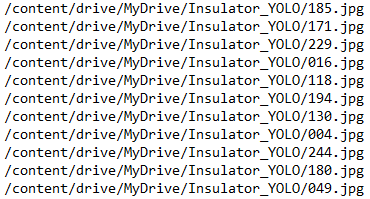

##Step 3: Preparation of required files

### For this you can create a directory with name of your choice. I named it as YOLOv4_Req
### In that directory, you need to 4 files
#### a. yolov4.cfg file that has the YOLO v4 architecture details
#### b. obj.name file that contains the list of classes on which you have trained your model
#### c. obj.data file that has paths of obj.names, train.txt, test.txt(only if you are evaluating on test dataset) and path of directory where you are saving the model weights
### <br>
### Now some project specific details, that will change based on your dataset
### Following changes were made in the yolov4.cfg file
### `classes = 3`
### `batch = 32`
### `subdivisions = 8`
### `max_batches = 6000`
### `steps=4800,5400`
### `anchors = 24, 18,  24, 22,  22, 25,  30, 29,  86, 17,  84, 28, 127, 29, 114, 46,  35,165, 224, 39, 202, 62, 300, 49, 174,101, 304, 68, 284, 89, 273,126, 340,119, 270,185`
### `mask = 0,1,2,3,4,5`

### Note that, mask were incremented for each of 3 layers
##<br><br>
## Step 4: Model Training

In [ ]:
#model training
%cd /content/darknet/
!mkdir /content/drive/MyDrive/17_Nov_Insulator_New/
!./darknet detector train /content/YOLO_V4_Req/obj.data /content/YOLO_V4_Req/yolov4-obj.cfg -dont_show -map

Streaming output truncated to the last 5000 lines.
 total_bbox = 245197, rewritten_bbox = 0.013866 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.446457), count: 21, class_loss = 7.182362, iou_loss = 9.085854, total_loss = 16.268215 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.596055), count: 22, class_loss = 6.446521, iou_loss = 7.142851, total_loss = 13.589373 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.000000), count: 1, class_loss = 0.000002, iou_loss = 0.000000, total_loss = 0.000002 
 total_bbox = 245240, rewritten_bbox = 0.013864 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.524113), count: 20, class_loss = 6.532237, iou_loss = 13.079111, total_loss = 19.611347 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.473546), count: 23, class_loss = 7.230944, iou_loss = 3.134036, total_loss = 10.3

## Step 5: mAP calculation
### Now that we have trained our model, it's time to evaluate the mAP of the model

### We can run calculate mAP for both training and testing data

In [ ]:
!./darknet detector map /content/YOLO_V4_Req/obj.data /content/YOLO_V4_Req/yolov4-obj.cfg -dont_show -map /content/drive/MyDrive/16_Nov_Insulator_New4/yolov4-obj_last.weights

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
valid: Using default 'data/train.txt'
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs

## Step 6. Evaluating model performance on images
### We can use detector test to inference the model on our images

In [ ]:
%cd /content/darknet/
!./darknet detector test /content/YOLO_V4_Req/obj.data /content/YOLO_V4_Req/yolov4-obj.cfg /content/yolov4-obj_best.weights /content/drive/MyDrive/Insulator_YOLO/024.jpg

/content/darknet
 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.0